Half the deaths in the United States and other developed countries are due to cardio vascular diseases. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.
It is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load data

In [ ]:
df= pd.read_csv('C:/Users/UPES/Pictures/jupyter/ml_python/datasets/framingham.csv')
df.head(10)

In [ ]:
df.columns.values

Education has nothing to do with prediction of heart disease, so drop the column

In [ ]:
df = df.drop(['education'], axis = 'columns')
df.head(10)

In [ ]:
df.shape

In [ ]:
df.describe()

Male column above is cubersome,lets rename it

In [72]:
df.rename(columns ={
    'male': 'is_male'
}, inplace = True)
df.head(10)

,is_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Handle missing values

In [73]:
#check total null values in the columns
df.isnull().sum()

is_male             0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [74]:
df.isnull().sum(axis =1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4210    0
4211    0
4212    0
4213    0
4214    0
4215    0
4216    0
4217    0
4218    0
4219    0
4220    0
4221    0
4222    0
4223    0
4224    0
4225    0
4226    0
4227    0
4228    0
4229    0
4230    0
4231    0
4232    0
4233    0
4234    0
4235    1
4236    0
4237    0
4238    0
4239    0
Length: 4240, dtype: int64

In [75]:
#replace NAN values with 0 for cigsPerDay column
df['cigsPerDay'].fillna(0,inplace= True)
df['cigsPerDay'].isnull().sum()

0

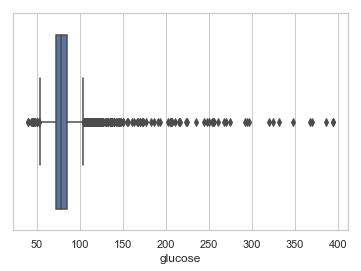

In [76]:
#handling missing values of glucose column, but before replav=cing the na values
#with mean or median lets first check the outliers by plotting the boxplot
sn.set(style= 'whitegrid')
sn.boxplot(x= df['glucose'])

In [77]:
#As there are many outliers so we'll replace na values with the median value
import math
med = df['glucose'].median()
df['glucose'].fillna(med,inplace = True)

In [78]:
#Now check for null values
df['glucose'].head(10)

0     77.0
1     76.0
2     70.0
3    103.0
4     85.0
5     99.0
6     85.0
7     78.0
8     79.0
9     88.0
Name: glucose, dtype: float64

In [79]:
df['glucose'].isnull().sum()

0

In [80]:
#Lets repleat this procedure for other features as well and handle their na values
new_df= df[['is_male','age','totChol','sysBP','glucose','cigsPerDay']]
new_df.head(10)

,is_male,age,totChol,sysBP,glucose,cigsPerDay
0,1,39,195.0,106.0,77.0,0.0
1,0,46,250.0,121.0,76.0,0.0
2,1,48,245.0,127.5,70.0,20.0
3,0,61,225.0,150.0,103.0,30.0
4,0,46,285.0,130.0,85.0,23.0
5,0,43,228.0,180.0,99.0,0.0
6,0,63,205.0,138.0,85.0,0.0
7,0,45,313.0,100.0,78.0,20.0
8,1,52,260.0,141.5,79.0,0.0
9,1,43,225.0,162.0,88.0,30.0


In [81]:
new_df.isnull().sum()

is_male       0
age           0
totChol       0
sysBP         0
glucose       0
cigsPerDay    0
dtype: int64

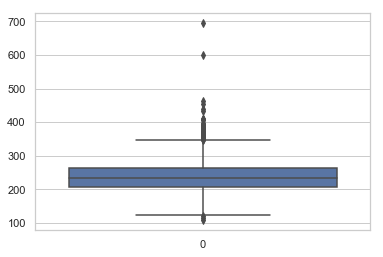

In [82]:
#totChol has some na values
sn.boxplot(data = df['totChol'])

In [83]:
#It also have outliers 
med = df['totChol'].median()
df['totChol'].fillna(med,inplace = True)

In [84]:
df['totChol'].isnull().sum()

0

In [85]:
df.isnull().sum()

is_male             0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

we have almost filled all the na values ,lets move ahead

In [86]:
df.describe()

,is_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4187.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4221.000000,4239.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,8.944340,0.029615,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.800801,75.878981,81.600943,0.151887
std,0.495027,8.572942,0.500024,11.904777,0.169544,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.079840,12.025348,22.860340,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [87]:
#count total no. of rows with missing values
count =0
for i in df.isnull().sum(axis = 1):
    if i>0 :
        count = count+1

print('Total no. of rows with missing data', count)

Total no. of rows with missing data 73


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4239
Data columns (total 15 columns):
is_male            4240 non-null int64
age                4240 non-null int64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(8), int64(7)
memory usage: 690.0 KB


# Exploratory data analysis

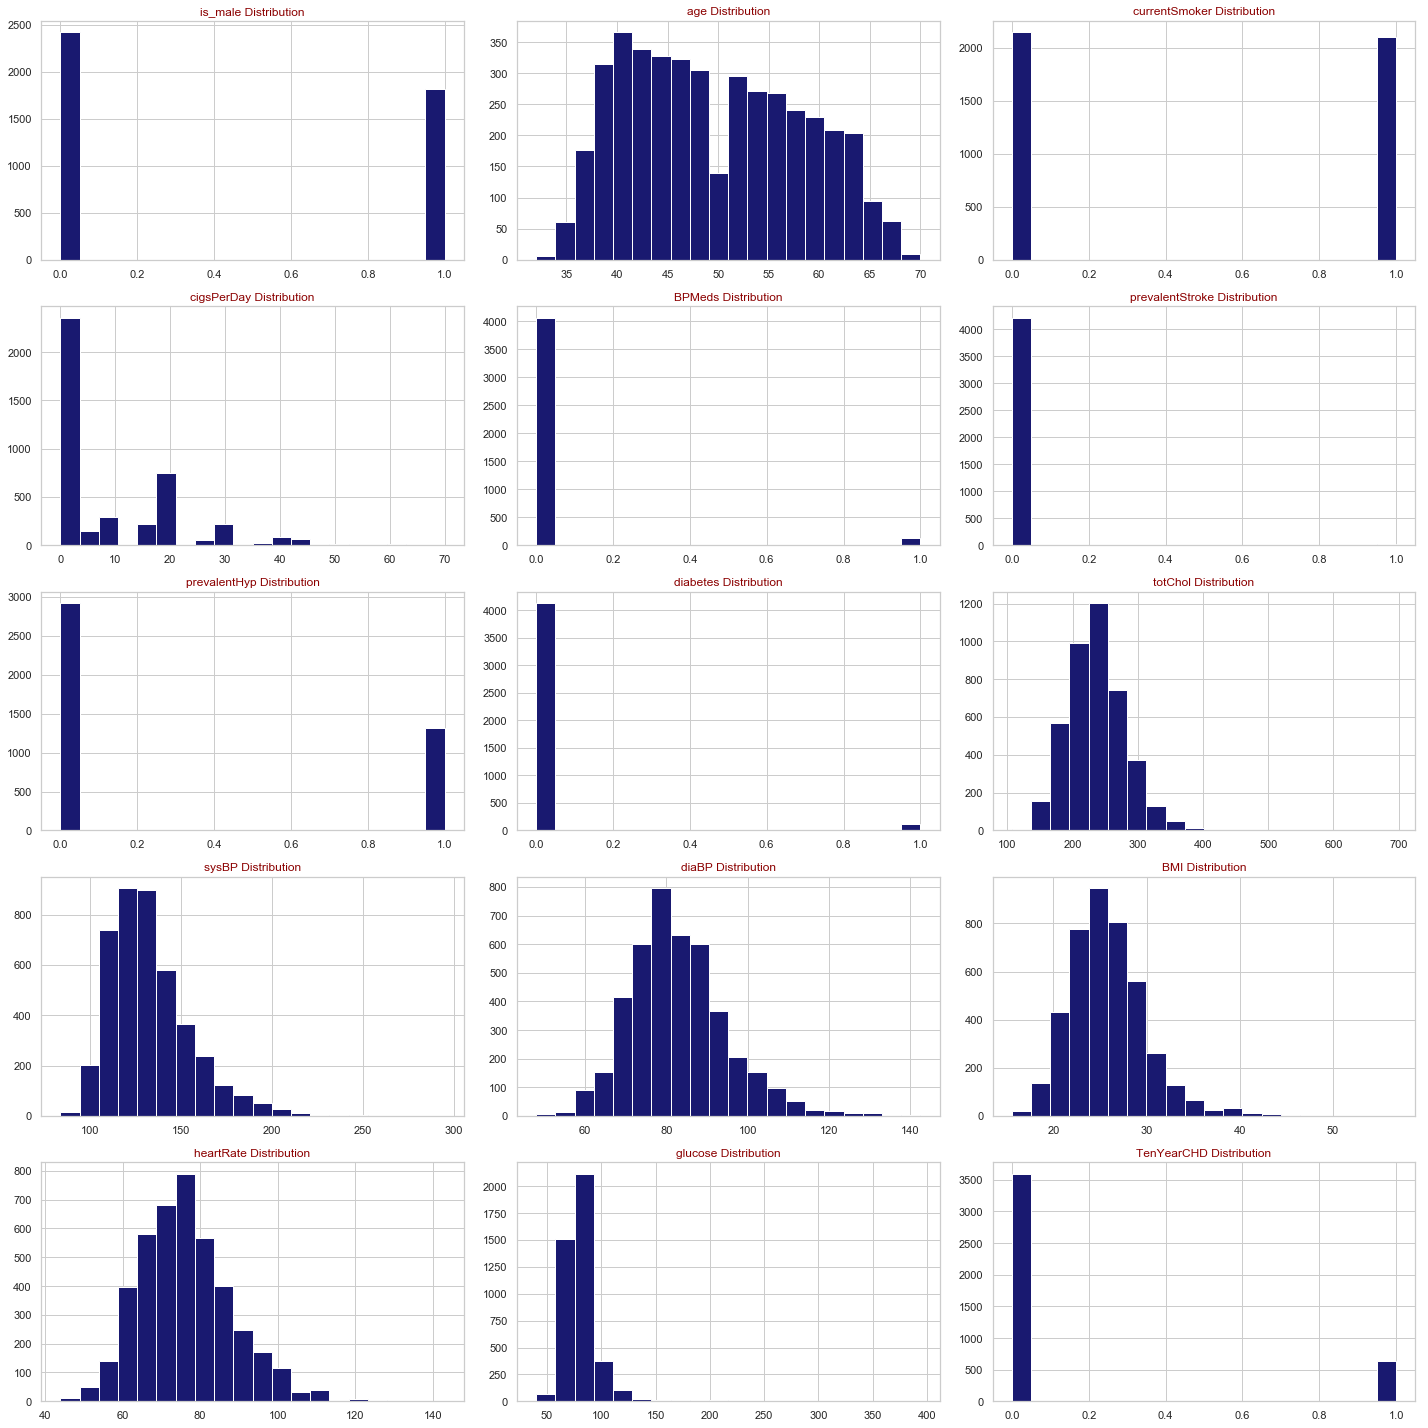

In [89]:
def draw_histograms(df, features, rows, cols):

    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,5,3)

In [90]:
#visualize the target variable
df['TenYearCHD'].value_counts()
#There are 3596 people with no heart disease

0    3596
1     644
Name: TenYearCHD, dtype: int64

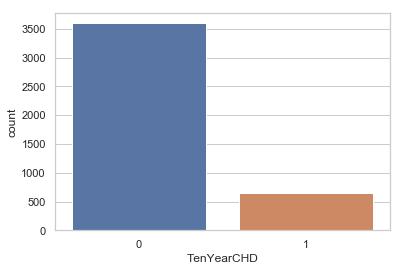

In [91]:
#using seaborn to plot countplot
#1 means yes, 0 means no
sn.countplot(x= 'TenYearCHD', data =df)

[]

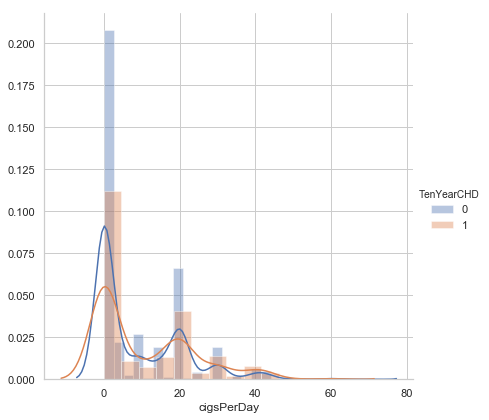

In [92]:
sn.FacetGrid(df, hue ='TenYearCHD', height = 6)\
.map(sn.distplot,'cigsPerDay')\
.add_legend()
plt.plot()

In [93]:
#As we can see people who smoke are more prone to risk

[]

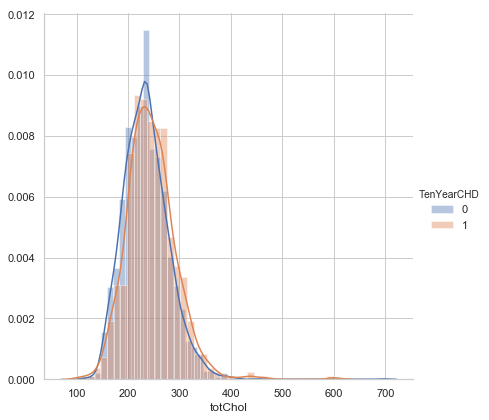

In [94]:
sn.FacetGrid(df, hue = 'TenYearCHD', height =6)\
.map(sn.distplot, 'totChol')\
.add_legend()
plt.plot()

[]

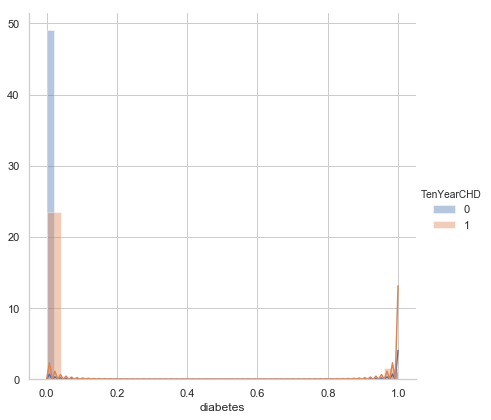

In [95]:
sn.FacetGrid(df, hue ='TenYearCHD', height =6)\
.map(sn.distplot, 'diabetes')\
.add_legend()
plt.plot()

In [100]:
df= df[np.isfinite(df['TenYearCHD'])]

In [101]:
df.shape

(4240, 15)

In [102]:
df.isnull().sum()

is_male             0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

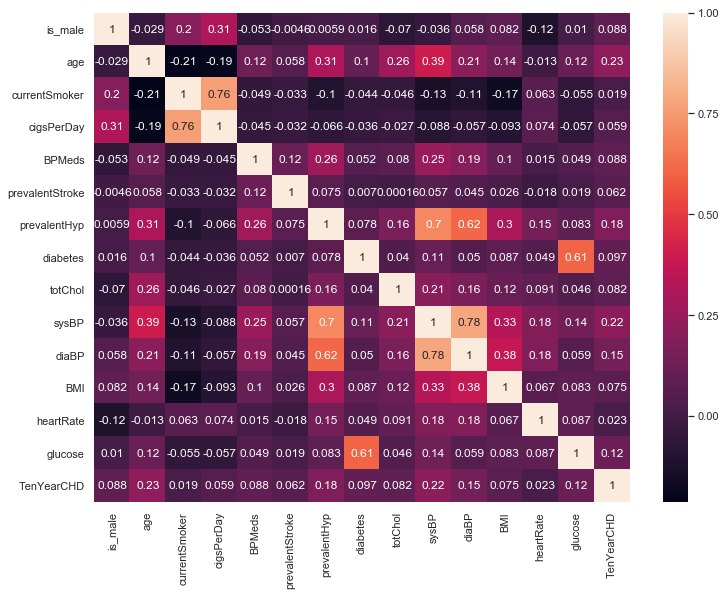

In [103]:
#lets plot the correlogram 
plt.figure(figsize=(12,9))
sn.heatmap(df.corr(),annot= True)

Training the dataset and fit the model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X= df[['is_male','age','cigsPerDay','totChol','sysBP','glucose']]
Y= df['TenYearCHD']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [105]:
reg = LogisticRegression()

In [108]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

H:\Anaconda_work\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
#accuracy-------
score = accuracy_score(y_test,y_pred)

In [110]:
#Accuracy is -----
score*100

85.69182389937107

Text(0, 0.5, 'Predicted values')

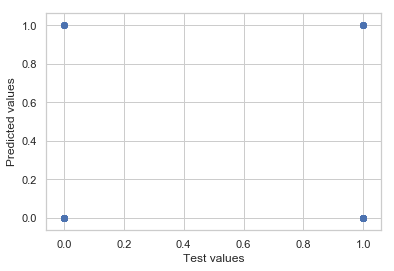

In [115]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test values")
plt.ylabel("Predicted values")

In [ ]:
#display the confusion matrix

In [111]:
con = confusion_matrix(y_test,y_pred)
con

array([[1085,    4],
       [ 178,    5]], dtype=int64)

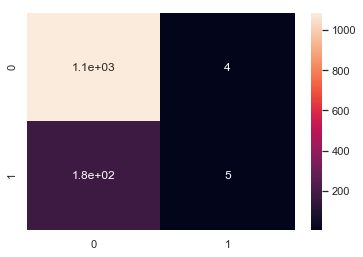

In [114]:
sn.set_style('whitegrid')
sn.heatmap(data= con, annot= True)